# Multiple Linear Regression

We just performed linear regression in the above section involving two variables. Almost all the real-world problems that you are going to encounter will have more than two variables. Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other. In this section, I have downloaded red wine quality dataset. The dataset related to red variants of the Portuguese “Vinho Verde” wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

We will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. Based on these features we will predict the quality of the wine.

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
data = pd.read_csv('wine-quality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.shape

(4898, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Once the above code is executed, all the columns should give False, In case for any column you find True result, then remove all the null values from that column using below code.

dataset = dataset.fillna(method='ffill')

Our next step is to divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels.

In [7]:
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = data['quality'].values

check the average value of the “quality” column.

C:\Users\bhart\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


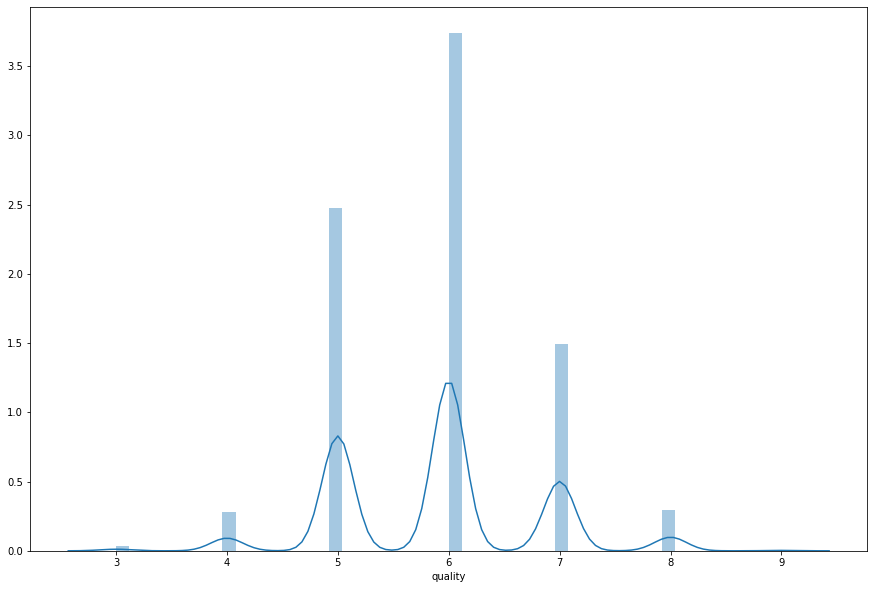

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['quality'])

 we can observe that most of the time the value is either 5 or 6.

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

 lets train our model.

In [10]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

As said earlier, in the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [11]:
print(regressor.coef_)

[ 1.06981517e-01 -1.81032516e+00 -1.51630286e-02  9.29140769e-02
 -5.56723628e-01  4.43552129e-03 -2.86630409e-04 -1.88992556e+02
  8.22368627e-01  6.38975597e-01  1.37843182e-01]


This means that for a unit increase in “density”, there is a decrease of 2.86 units in the quality of the wine. Similarly, a unit decrease in “Chlorides“ results in an increase of 5.87(average of target data) units in the quality of the wine. We can see that the rest of the features have very little effect on the quality of the wine.

let's do prediction on test data.

In [12]:
y_pred = regressor.predict(X_test)

Check the difference between the actual value and predicted value.

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1=df.head(25)

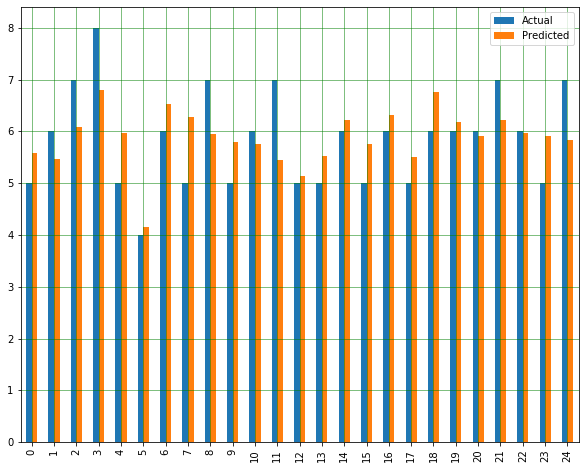

In [17]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

As we can observe here that our model has returned pretty good prediction results.

The final step is to evaluate the performance of the algorithm.

We’ll do this by finding the values for MAE, MSE, and RMSE. Execute the following

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.629700760800768
Mean Squared Error: 0.6598453517957326
Root Mean Squared Error: 0.8123086554972393


You can see that the value of root mean squared error is 0.81, which is slightly greater than 10% of the mean value which is (average of target value) . This means that our algorithm was not very accurate but can still make reasonably good predictions.


There are many factors that may have contributed to this inaccuracy, for example : Need more data: We need to have a huge amount of data to get the best possible prediction. Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that. Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.